# CAP 6619 - Deep Learning
## Dr Marques
## Project 3
## Image classification using the CIFAR-10 dataset

Total number of points: 100 (+ 15 optional bonus points), as indicated.

**Include your name here:** (enter your name)

**Include 'shared link' to 'your' final version of this NB here:** (enter link from above right here)

*Expand all notebook bocks/sections and ensure code has properly executed, save as pdf(above left menu) when completed to submit to Canvas.*

Useful references and sources:

https://www.kaggle.com/c/cifar-10

https://keras.io/examples/vision/metric_learning/

https://www.kaggle.com/roblexnana/cifar10-with-cnn-for-beginer


##### **Cite your sources** *(OPTIONAL if none used beyond those above)*

Add your own sources and references here.

# Part 1: Designing and using your own CNN model

## Part 1.1: Setup

### Import Needed Resources / Libraries

In [ ]:
from __future__ import print_function
from tensorflow import keras
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

import random

import tensorflow as tf
from collections import defaultdict
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay

### Load and prepare the data

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the image data
x_train = x_train.astype("float32") / 255.0
y_train = np.squeeze(y_train)
x_test = x_test.astype("float32") / 255.0
y_test = np.squeeze(y_test)

170498071/170498071 [==============================] - 3s 0us/step


## Part 1.2: Examine Data

In [ ]:
# Number of samples
print("Number of training sample: ",y_train.shape[0])
print("Number of test samples: ", y_test.shape[0])

Number of training sample:  50000
Number of test samples:  10000


In [ ]:
# Number of classes
num_classes = max(y_test)+1
print(num_classes)

10


In [ ]:
# Shape of image data
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


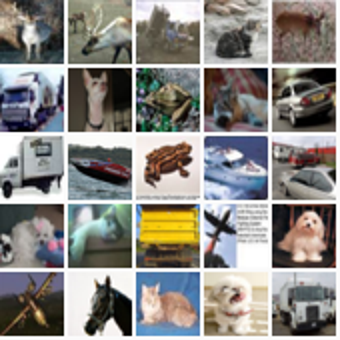

In [ ]:
# Show collage of 25 (randomly selected) images

height_width = 32


def show_collage(examples):
    box_size = height_width + 2
    num_rows, num_cols = examples.shape[:2]

    collage = Image.new(
        mode="RGB",
        size=(num_cols * box_size, num_rows * box_size),
        color=(250, 250, 250),
    )
    for row_idx in range(num_rows):
        for col_idx in range(num_cols):
            array = (np.array(examples[row_idx, col_idx]) * 255).astype(np.uint8)
            collage.paste(
                Image.fromarray(array), (col_idx * box_size, row_idx * box_size)
            )

    # Double size for visualisation.
    collage = collage.resize((2 * num_cols * box_size, 2 * num_rows * box_size))
    return collage


# Show a collage of 5x5 random images.
sample_idxs = np.random.randint(0, 50000, size=(5, 5))
examples = x_train[sample_idxs]
show_collage(examples)

In [ ]:
idx = y_train[0]
print(idx)

6


In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
labels[idx]

'Frog'

In [ ]:
plt.imshow(x_train[0])

In [ ]:
# Convert class vectors to binary class matrices.
# This is called one-hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## **Part 1.3: Design and configure model** *(CNN)*

In this part we will use a convolutional neural network (CNN) built from scratch.


In [ ]:
batch_size = 128
epochs = 10
data_augmentation = False

In [ ]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTEN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

## **Part 1.4: Train the model**

In [ ]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
391/391 [==============================] - 19s 16ms/step - loss: 1.9276 - accuracy: 0.2894 - val_loss: 1.6590 - val_accuracy: 0.4099
Epoch 2/10
391/391 [==============================] - 5s 13ms/step - loss: 1.6451 - accuracy: 0.3992 - val_loss: 1.5111 - val_accuracy: 0.4557
Epoch 3/10
391/391 [==============================] - 5s 14ms/step - loss: 1.5363 - accuracy: 0.4395 - val_loss: 1.4930 - val_accuracy: 0.4614
Epoch 4/10
391/391 [==============================] - 5s 14ms/step - loss: 1.4594 - accuracy: 0.4677 - val_loss: 1.3804 - val_accuracy: 0.4960
Epoch 5/10
391/391 [==============================] - 5s 14ms/step - loss: 1.3979 - accuracy: 0.4955 - val_loss: 1.2935 - val_accuracy: 0.5413
Epoch 6/10
391/391 [==============================] - 5s 13ms/step - loss: 1.3457 - accuracy: 0.5157 - val_loss: 1.2502 - val_accuracy: 0.5563
Epoch 7/10
391/391 [==============================] - 5s 13ms/step - loss: 1.2973 - accuracy: 0.5363 - val_loss: 1.2230 - val_accuracy: 0.561

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
plotmodelhistory(history)

## **Part 1.5: Evaluate the model**

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.1033 - accuracy: 0.6127
Test loss: 1.1033086776733398
Test accuracy: 0.6126999855041504
313/313 [==============================] - 1s 2ms/step


In [ ]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

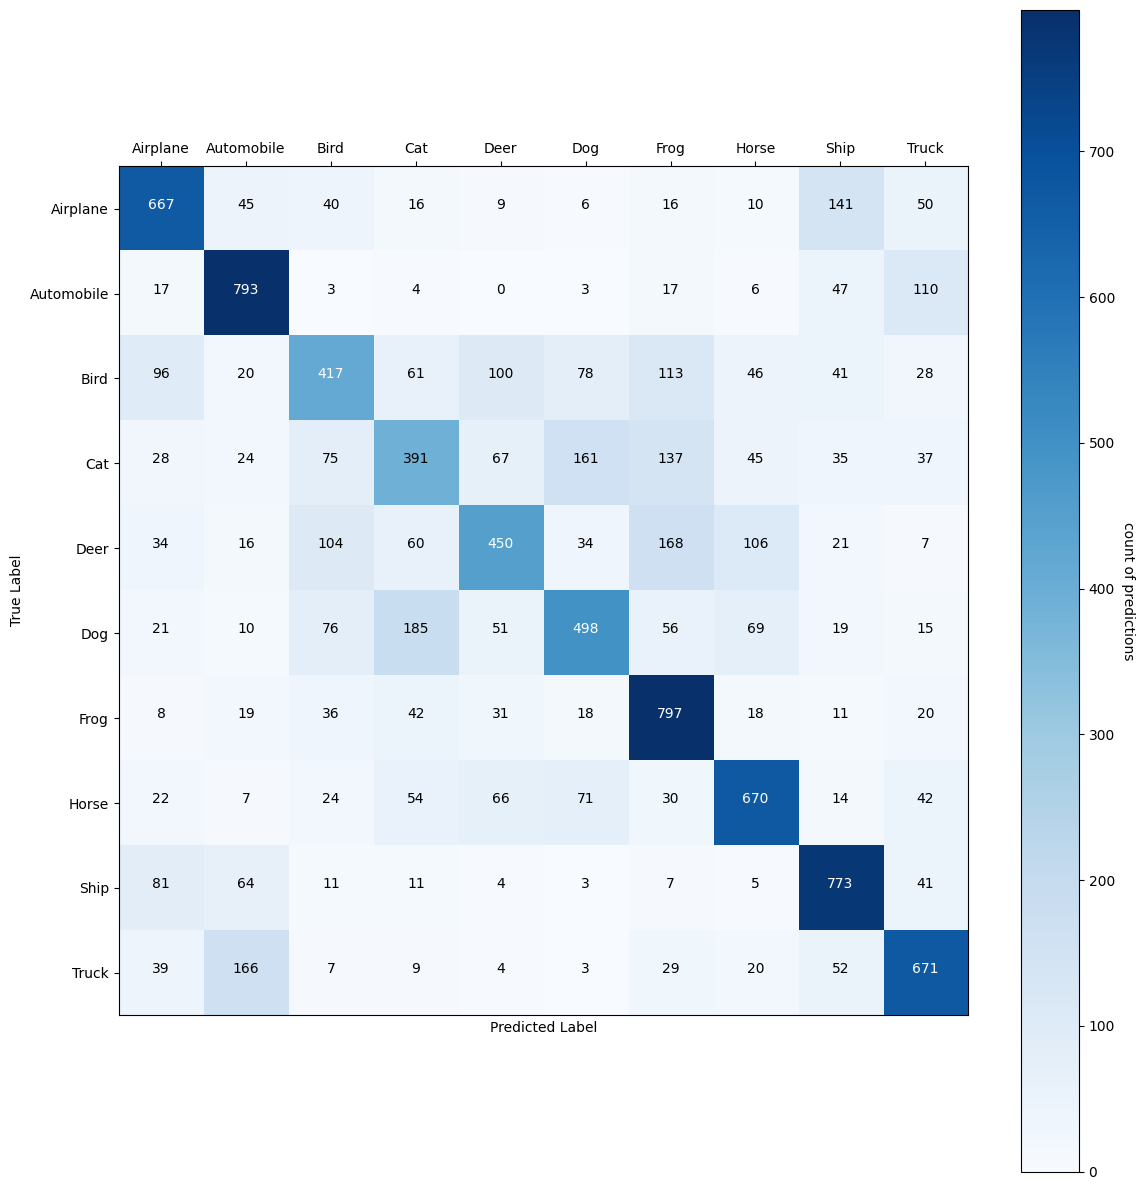

In [ ]:
# Plot confusion matrix

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes)
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [ ]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66      1000
           1       0.68      0.79      0.73      1000
           2       0.53      0.42      0.47      1000
           3       0.47      0.39      0.43      1000
           4       0.58      0.45      0.51      1000
           5       0.57      0.50      0.53      1000
           6       0.58      0.80      0.67      1000
           7       0.67      0.67      0.67      1000
           8       0.67      0.77      0.72      1000
           9       0.66      0.67      0.66      1000

    accuracy                           0.61     10000
   macro avg       0.61      0.61      0.60     10000
weighted avg       0.61      0.61      0.60     10000



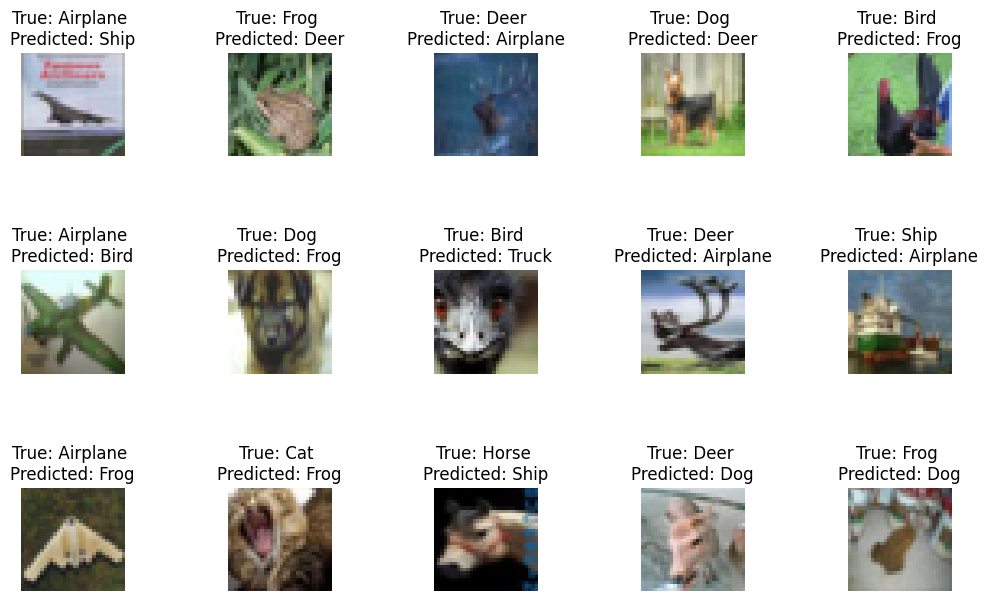

In [ ]:
# Inspect errors
R = 3
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,8))
axes = axes.ravel()

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[Y_true[misclassified_idx[i]]],
                                                  labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [ ]:
def show_test(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(x_test[number], axis=0)
    predict_x=model.predict(test_image)
    test_result=np.argmax(predict_x,axis=1)
    plt.imshow(x_test[number])
    dict_key = test_result[0]
    plt.title("Predicted: {} \nTrue Label: {}".format(labels[dict_key],
                                                      labels[Y_true[number]]))

1/1 [==============================] - 0s 152ms/step


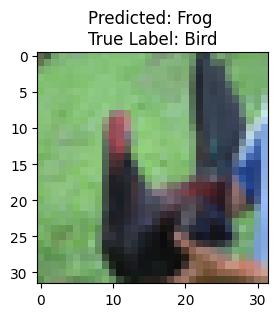

In [ ]:
show_test(25)

## **PART 1** - *Your Turn*

### **Part 1 - Tasks:**

**1.1  &emsp;(*required*) - 10 points each**

 &emsp;**1.1.1** Is the dataset balanced?

 &emsp;**1.1.2** Does your model suffer from overfitting? If so, what would you suggest doing about it?

 &emsp;**1.1.3** Is accuracy a good metric of success in this case? Why (not)?

  &emsp;**1.1.4** What is the baseline accuracy for this dataset/problem?

**1.2 &emsp;(*optional*) - 15 bonus points**

 Write code to try different combinations of:

 - numbers of hidden layers and units per layer

 - loss functions

 - activation functions

 Please refrain from using better architectures (Vision Transformers, etc.) but feel free to use "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

#### **Part 1.1 - Required Tasks:**   *(responses)*

 **1.1.1**

   >Is the dataset balanced?

 *(double click to enter your response)*

 **1.1.2**
 > Does your model suffer from overfitting? If so, what would you suggest
doing about it?

 *(double click to enter your response)*

 **1.1.3**
 > Is accuracy a good metric of success in this case? Why (not)?

 *(double click to enter your response)*

 **1.1.4**
 > What is the baseline accuracy for this dataset/problem?

 *(double click to enter your response)*

#### **Part 1.2 - Optional Tasks:** *(responses & code)*

> Write code to try different combinations of:
- numbers of hidden layers and units per layer
- loss functions
- activation functions

>  Please refrain from using better architectures (Vision Transformers, etc.) but feel free to use "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

In [ ]:
# Your exploratory code here and in additional cells as needed


# **Part 2: Transfer Learning**

## **Part 2.1: Setup**

In [ ]:
from keras import Sequential
from keras.applications import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical

In [ ]:
#Import dataset (again)
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [ ]:
#Print the dimensions of the datasets to make sure everything's kosher

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:
#One hot encode the labels.Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
# Lets print the dimensions one more time to see if things changed the way we expected

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


## **Part 2.2: Using ResNet50 as a base model**

Learn more about ResNet50 at: https://www.kaggle.com/keras/resnet50

In [ ]:
base_model_1 = ResNet50(include_top=False,
                        weights='imagenet',
                        input_shape=(32,32,3),
                        classes=y_train.shape[1])

model_1=Sequential()
#Add the Dense layers along with activation and batch normalization
model_1.add(base_model_1)
model_1.add(Flatten())

#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(4000,activation=('relu'),input_dim=512))
model_1.add(Dense(2000,activation=('relu')))
model_1.add(Dense(1000,activation=('relu')))
model_1.add(Dense(500,activation=('relu')))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer

In [ ]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_12 (Dense)            (None, 4000)              8196000   
                                                                 
 dense_13 (Dense)            (None, 10)                40010     
                                                                 
Total params: 31,823,722
Trainable params: 31,770,602
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
batch_size= 128
epochs=10
learn_rate=.03

sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
adam=Adam(learning_rate=learn_rate)

In [ ]:
# Compile the model
model_1.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Train the model
history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose = 1,
              validation_data=(x_val, y_val),
              shuffle=True)

Epoch 1/10
274/274 [==============================] - 23s 67ms/step - loss: 2.0585 - accuracy: 0.2571 - val_loss: 1.8845 - val_accuracy: 0.3517
Epoch 2/10
274/274 [==============================] - 17s 61ms/step - loss: 1.4313 - accuracy: 0.4698 - val_loss: 3.0169 - val_accuracy: 0.1954
Epoch 3/10
274/274 [==============================] - 18s 64ms/step - loss: 1.1573 - accuracy: 0.5918 - val_loss: 1.2690 - val_accuracy: 0.5680
Epoch 4/10
274/274 [==============================] - 17s 64ms/step - loss: 0.9742 - accuracy: 0.6612 - val_loss: 1.8699 - val_accuracy: 0.3937
Epoch 5/10
274/274 [==============================] - 17s 64ms/step - loss: 0.8526 - accuracy: 0.7061 - val_loss: 1.2369 - val_accuracy: 0.5985
Epoch 6/10
274/274 [==============================] - 18s 64ms/step - loss: 0.6994 - accuracy: 0.7558 - val_loss: 1.0181 - val_accuracy: 0.6650
Epoch 7/10
274/274 [==============================] - 18s 64ms/step - loss: 0.6097 - accuracy: 0.7907 - val_loss: 0.9089 - val_accuracy:

In [ ]:
def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history_1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


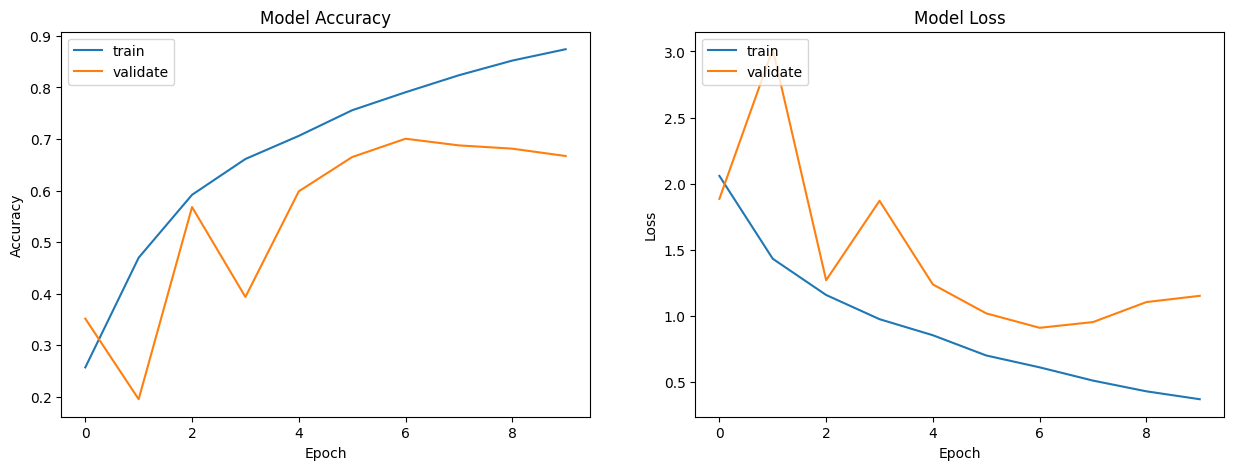

In [ ]:
plotmodelhistory(history_1)

In [ ]:
# Score trained model.
scores = model_1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model_1.predict(x_test)

313/313 [==============================] - 6s 19ms/step - loss: 1.1662 - accuracy: 0.6665
Test loss: 1.1661683320999146
Test accuracy: 0.6664999723434448
313/313 [==============================] - 4s 9ms/step


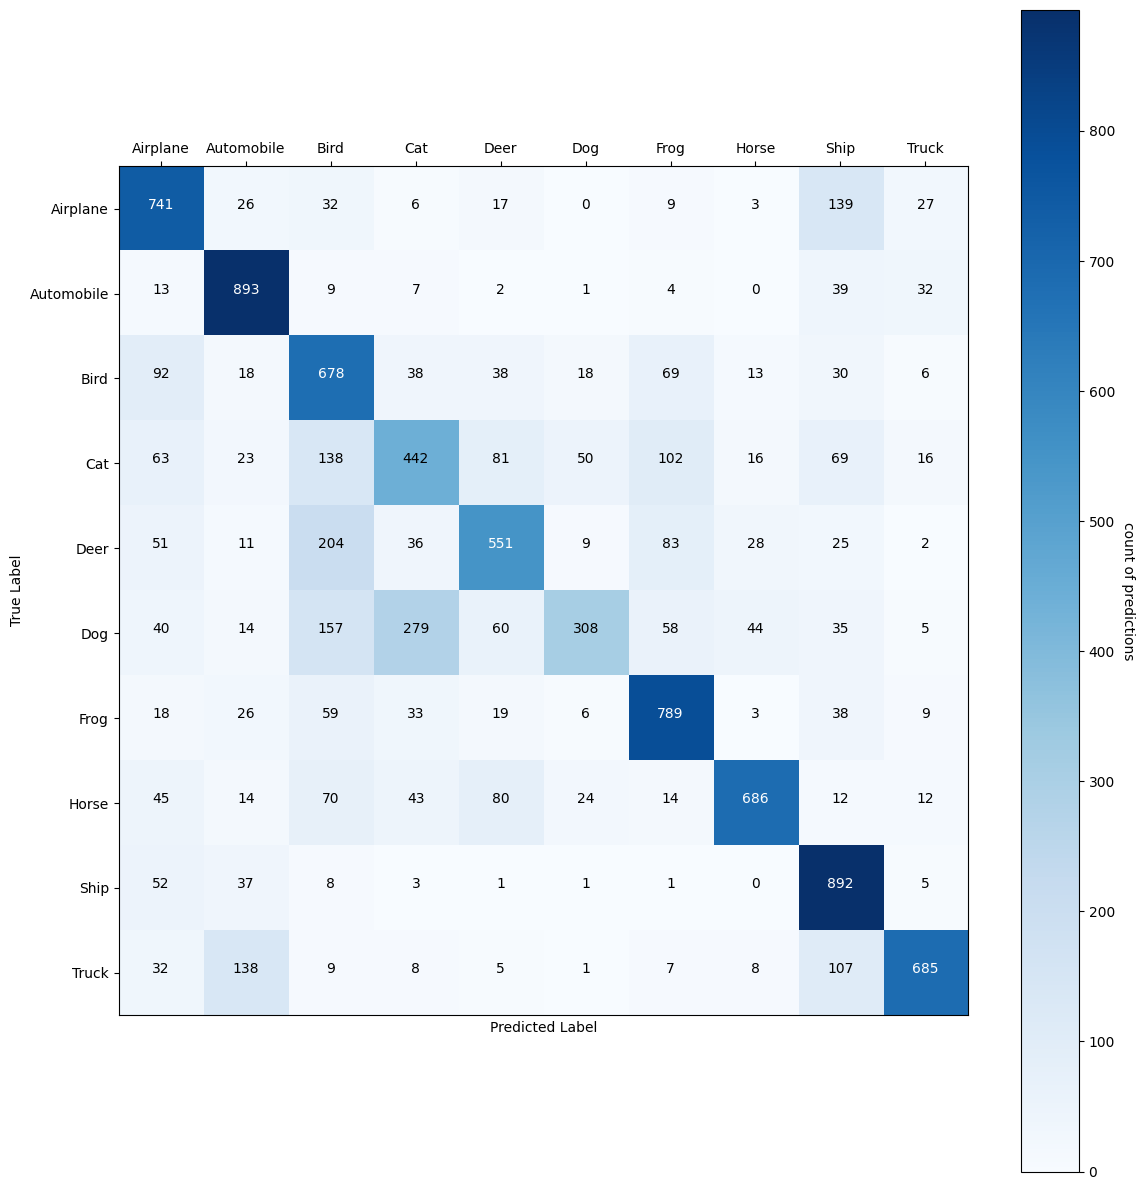

In [ ]:
# Plot confusion matrix

# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes)
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

## **Part 2.3: Your turn!**

Write code to build, train, and evaluate *another* transfer learning model. (50 points)










### **Part 2.3.1: Tasks *(required)***

Write code to build, train, and evaluate *another* transfer learning model.

Here are a few things you could do:
*   Use a different base model, e.g., VGG19 (see https://www.kaggle.com/keras/vgg19)
*   Add Dropout layers
*   Use data augmentation
*   Change optimizer
*   Change other hyperparameters (learning rate, batch size, etc.)


***write your code in the code cell provided below***


### **Part 2.3.1: Your Code**

Please seperate models, if more than one are generated, with text cells containing something similar to the following

#### **Model 2 (some descriptor)**

additional models would have 3, 4, etc and unique descriptors.

#### **Model 2** *(double click to add some descriptor here)*

In [ ]:
# Your code for Part 2.3.1 tasks here and in additional cells as needed for various models you examine

### Summary table of results
(all values and remarks are just _examples_) *(double click cell to edit)*

| Method | Test accuracy | Remarks |
| --- | --- | --- |
| (Part 1) Baseline CNN designed from scratch | 0.752 | Bad at telling cats from dogs |
| (Part 2 - Model 1) Transfer learning using pre-trained CNN (ResNet50) | 0.769| Disappointly low, signs of overfitting |
| (Part 2 - Model 2) Model / variation of your choice | 0.744| Disappointly low, signs of overfitting |
| (Part 2 - Model 3) Model / variation of your choice | 0.744| Disappointly low, signs of overfitting |


### Conclusions (10 points)

Write your conclusions here.